In [1]:
using Plots
using LaTeXStrings

In [1]:
import Pkg; Pkg.add("LaTeXStrings")

    Updating registry at `C:\Users\chica\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\chica\.julia\environments\v1.8\Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.0
  No Changes to `C:\Users\chica\.julia\environments\v1.8\Manifest.toml`


# Garduño Pérez Alexa Itzel

# Modelo de Hodgkin-Huxley
El modelo de Hodgkin-Huxley fue propuesto en 1952 tras haber estudiado la fisiología del axón gigante del calamar y marcó un hito en historia de la neurociencia, a partir de ese momento muchos modelos se han desarrollado tomándolo como base. En su forma clásica el modelo se define como un sistema de cuatro ecuaciones diferenciales como se muestra a continuación:

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

en donde:
* $V$ la diferencia de potencial en la membrana
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$.

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:

\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_n(V) = 0.125 e^{-\frac{V}{80}}
\end{align}

Observemos que cuando $V = 10$ la función $\alpha_n$ está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) = \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)} = \frac{-0.01}{-0.1} = 0.1
\end{align}

In [2]:
## Programa las función alfa_n como función del voltaje V.
## Necesitarás definir un caso especial cuando V - 10 < epsilon
## Utiliza esta celda para ver como se comporta tu función en esta vecindad
## y elegir un valor de epsilon adecuado

function alpha_n(V)
return 0.01 .* (10 .- V) ./ (exp((10 .- V) ./ 10)-1)
end

alpha_n (generic function with 1 method)

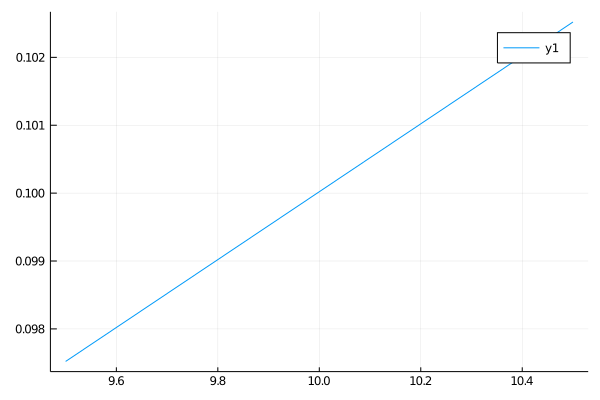

In [3]:
plot(alpha_n, 9.5:10.5)

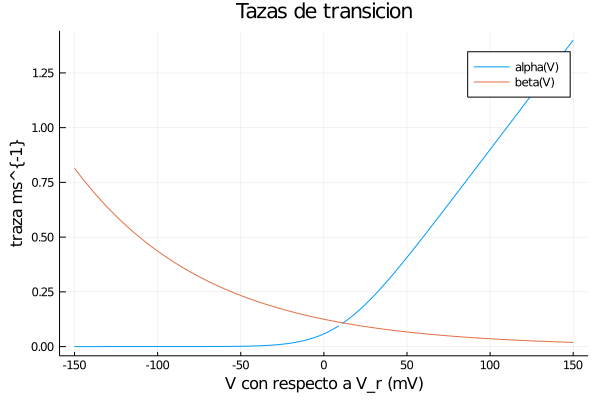

In [4]:
## Programa la funciones como función del voltaje V, para la compuerta de K
## Genera luego una gráfica de alfa_n y beta_n

function beta_n(V)
   return 0.125 * exp(.-V/80)
end

function plotAlpha()
    V = -150:150
    alpha = [alpha_n(v) for v in V]
    beta = [beta_n(v) for v in V]
    plot(
        V,
        alpha,
        title="Tazas de transicion",
        xlabel="V con respecto a V_r (mV)", 
        ylabel="traza ms^{-1}", 
        label="alpha(V)"
    )
    plot!(V, beta, label="beta(V)")
end
plotAlpha()

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_m(V) &= 4 e^{-\frac{V}{18}}
\end{align}

\begin{align}
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}}
\end{align}

\begin{align}
  \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}

Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) = \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)} = \frac{-0.1}{-0.1} = 1
\end{align}

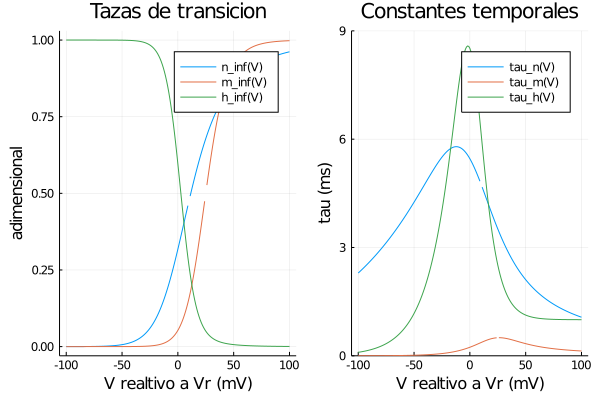

In [21]:
## Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales.

## Agrega las funciones correspondientes para la compuerta de sodio también,
## deduce sus definiciones a partir de las llamadas en la función para graficar

## primero definimos cada función conocida y después n infinito, m infinito, h infinito y del mismo modo para tau 

function alpha_n(V)
return 0.01 .* (10 .- V) ./ (exp((10 .- V) ./ 10) .- 1)
end

function beta_n(V)
    return 0.125 * exp(-V/80)
end

function alpha_m(V)
    return 0.1 * (25 .- V) ./ (exp(2.5 .- V ./ 10) .- 1)
end

function beta_m(V)
    return 4 * exp(- V/18)
end

function alpha_h(V)
    return 0.07 * exp(- V/20)
end

function beta_h(V)
    return 1/(exp(3 .- V ./ 10) .+ 1)
end

function tau_inf(alpha, beta)
    return 1 ./ (alpha .+ beta )
end

function n_inf(alpha, beta)
    return alpha ./ (alpha .+ beta )
end

function plotParameters()
    V = -100:100
    
    n_inf_n = n_inf(alpha_n.(V), beta_n.(V))
    tau_inf_n = tau_inf(alpha_n.(V), beta_n.(V))
    
    n_inf_m = n_inf(alpha_m.(V), beta_m.(V))
    tau_inf_m = tau_inf(alpha_m.(V), beta_m.(V))
    
    n_inf_h = n_inf(alpha_h.(V), beta_h.(V))
    tau_inf_h = tau_inf(alpha_h.(V), beta_h.(V))
    
    p1 = plot(
        V,
        [n_inf_n, n_inf_m, n_inf_h],
        label=["n_inf(V)" "m_inf(V)" "h_inf(V)"]
    )
    
    p2 = plot(
        V,
        [tau_inf_n, tau_inf_m, tau_inf_h],
        label=["tau_n(V)" "tau_m(V)" "tau_h(V)"]
    )
    ylims!(p2,0,9)
    plot(
        p1,
        p2,
        layout=(1, 2),
        title=["Tazas de transicion" "Constantes temporales"],
        xlabel=["V realtivo a Vr (mV)" "V realtivo a Vr (mV)"],
        ylabel=["adimensional" "tau (ms)"],
        legend=true
    )
end


plotParameters()

![tasas_constantes](figuras/tazas-y-constantes.jpg)

## Simulación con el método numérico de Euler

El método de Euler realiza una aproximación a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y calculamos el valor de $y$ para el tiempo $t + \Delta t$ en dicho punto iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} = g_{Na}m^3h
\end{align}

\begin{align}
  G_{K} = g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando los resultados obtenidos con el método de Euler y produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

In [7]:
# NOTA
# Los diccionarios son objectos que almacenan datos de la forma llave-valor (key-value)
# muy útiles para trabajar con información que tiene que ser etiquetada. Puedes encontrar más
# información sobre como trabajar con ellos en la documentación oficial de Julia:
# https://docs.julialang.org/en/v1/base/collections/#Dictionaries

parametros = Dict(
    "DeltaT" => 0.01,   # ms
    "maxT" => 50.0,     # ms    
    "V0" => 0.0,        # mV
    "gNa" => 120.0,     # mS/cm2
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,        # micro F/cm2
    "ENa" => 115.0,     # Utilizando la convensión original de Hodkin-Huxley
    "EK" => -12.0,
    "EL" => 10.613
)

function makeIext(t0=10.0, tfin=16.0, current=6.5)
    function Iext(t)
        """ Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microampers.
        """
        if (t>t0) & (t<tfin)
            return current # micro A/cm2
        else
            return 0
        end
    return Iext
    end
end

makeIext (generic function with 4 methods)

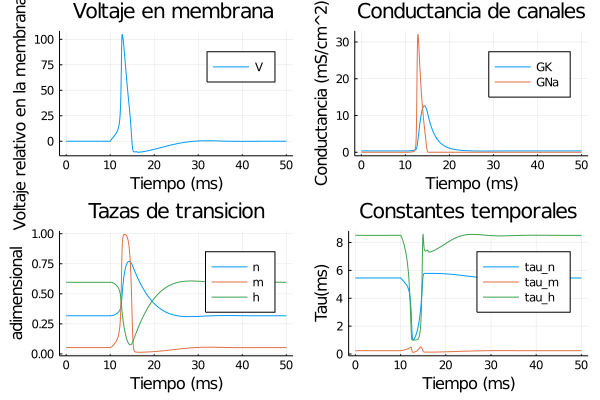

In [35]:
# Implementa aquí el resultado del algoritmo de intregración numérica de Euler para calcular V(t).
# Asegúrate de que, al ejecutar la simulación con los parámetros por defecto, se reproduce la imagen de arriba.
# Después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes
# ¿Qué observas?
# Inserta al final una celda con tus comentarios y resultados

function eulerSimulation(parametros, Iext)
    # Primero definimos los parametros 
    DeltaT = parametros["DeltaT"]
    maxT = parametros["maxT"]
    V0 = parametros["V0"]
    gNa = parametros["gNa"]
    gK = parametros["gK"]
    gL = parametros["gL"]
    Cm = parametros["Cm"]
    ENa = parametros["ENa"]
    EK = parametros["EK"]
    EL = parametros["EL"]
    
    # Ahora definimos las variables iniciales
    V = [V0]
    n = [alpha_n(V0)/(alpha_n(V0) + beta_n(V0))]
    m = [alpha_m(V0)/(alpha_m(V0) + beta_m(V0))]
    h = [alpha_h(V0)/(alpha_h(V0) + beta_h(V0))]
    GK = [gK * n[1]^4]
    GNa = [gNa * m[1]^3 * h[1]]
    tauN = [1/(alpha_n(V0) + beta_n(V0))]
    tauM = [1/(alpha_m(V0) + beta_m(V0))]
    tauH = [1/(alpha_h(V0) + beta_h(V0))]
    T = [0.0]
    
    # después utilizamos el método de euler 
    t = 0.0
    while t < maxT
        t += DeltaT
        
        # Ahora calculamos las variables en cada caso
        Vn = V[end]
        nn = n[end]
        mn = m[end]
        hn = h[end]
        
        Ina = gNa * mn^3 * hn * (Vn - ENa)
        IK = gK * nn^4 * (Vn - EK)
        IL = gL * (Vn - EL)
        Iext_val = Iext(t)
        
        Vn1 = Vn + DeltaT * (1/Cm) * (Iext_val - Ina - IK - IL)
        nn1 = nn + DeltaT * (alpha_n(Vn)*(1 - nn) - beta_n(Vn)*nn)
        mn1 = mn + DeltaT * (alpha_m(Vn)*(1 - mn) - beta_m(Vn)*mn)
        hn1 = hn + DeltaT * (alpha_h(Vn)*(1 - hn) - beta_h(Vn)*hn)
        
        # actualizamos cada valor 
        push!(V, Vn1)
        push!(n, nn1)
        push!(m, mn1)
        push!(h, hn1)
        push!(GK, gK * nn1^4)
        push!(GNa, gNa * mn1^3 * hn1)
        push!(tauN, 1/(alpha_n(Vn1) + beta_n(Vn1)))
        push!(tauM, 1/(alpha_m(Vn1) + beta_m(Vn1)))
        push!(tauH, 1/(alpha_h(Vn1) + beta_h(Vn1)))
        push!(T, t)
    end
    
    # definimos los resultados para todos los valores
    resultado = Dict(
        "V" => V,
        "n" => n,
        "m" => m,
        "h" => h,
        "GK" => GK,
        "GNa" => GNa,
        "tauN" => tauN,
        "tauM" => tauM,
        "tauH" => tauH,
        "T" => T
    )
    
    return resultado
end

function plotSimulation(resultado)
    tiempo = resultado["T"]
  # describimos las caracteristicas de cada gráfica deseada  
    p1 = plot(tiempo, resultado["V"],title = "Voltaje en membrana ", xlabel="Tiempo (ms)", ylabel="Voltaje relativo en la membrana (mV)", label="V")
    p2 = plot(tiempo, [resultado["GK"], resultado["GNa"]],title = "Conductancia de canales", xlabel="Tiempo (ms)", ylabel="Conductancia (mS/cm^2)", label=["GK" "GNa"])
    p3 = plot(tiempo, [resultado["n"], resultado["m"], resultado["h"]],title= "Tazas de transicion", xlabel="Tiempo (ms)", ylabel="adimensional", label=["n" "m" "h"])
    p4 = plot(tiempo, [resultado["tauN"], resultado["tauM"], resultado["tauH"]],title = "Constantes temporales", xlabel="Tiempo (ms)", ylabel="Tau(ms)", label=["tau_n" "tau_m" "tau_h"])
    
    plot(p1, p2, p3, p4, layout=(2, 2), legend=true)
end

# Para nuestras gráficas definimos los parámetros de la corriente externa
t0 = 10.0
tfin = 16.0
current = 6.5
Iext = makeIext(t0, tfin, current)

# ahora definimos el resultado como la simulacion para nuestros parametros y el Iext
resultado = eulerSimulation(parametros, Iext)

# Por último graficamos los 
plotSimulation(resultado)

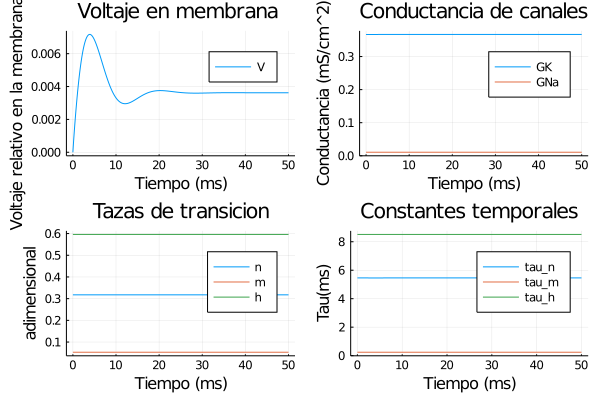

In [37]:
# Parámetros de la corriente externa
t0 = 30.0
tfin = 16.0
current = 10
Iext = makeIext(t0, tfin, current)

# Simulación
resultado = eulerSimulation(parametros, Iext)

# Graficar resultados
plotSimulation(resultado)

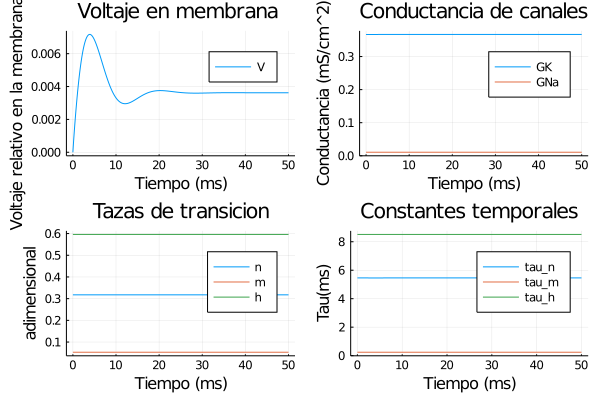

In [38]:
# Parámetros de la corriente externa
t0 = 20.0
tfin = 16.0
current = -10
Iext = makeIext(t0, tfin, current)

# Simulación
resultado = eulerSimulation(parametros, Iext)

# Graficar resultados
plotSimulation(resultado)

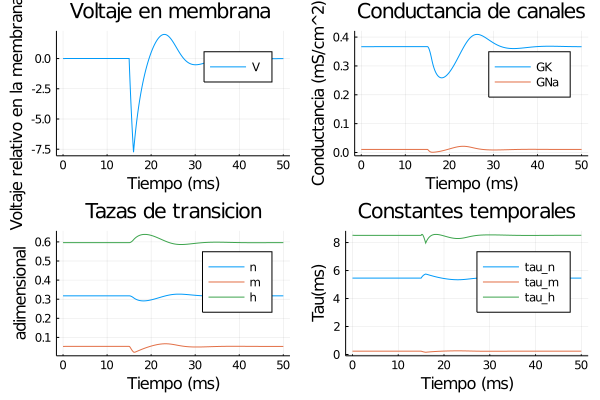

In [39]:
# Parámetros de la corriente externa
t0 = 15.0
tfin = 16.0
current = -10
Iext = makeIext(t0, tfin, current)

# Simulación
resultado = eulerSimulation(parametros, Iext)

# Graficar resultados
plotSimulation(resultado)

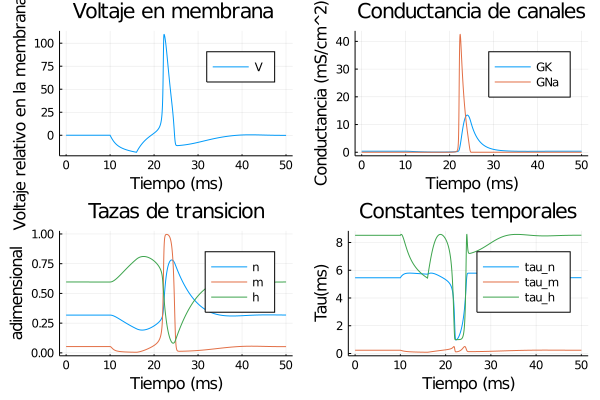

In [40]:
# Parámetros de la corriente externa
t0 = 10.0
tfin = 16.0
current = -10
Iext = makeIext(t0, tfin, current)

# Simulación
resultado = eulerSimulation(parametros, Iext)

# Graficar resultados
plotSimulation(resultado)

# Comentarios y resultados

En el primer caso cuando se cambio la corriente a 10 microamperes y 30 milisegundos el voltaje de membrana aumenta a 0.07 mV en los primeros 5 ms, disminuye pasando los10 ms y para los 20 ms se mantiene constante en 0.04 mV, y en los casos de las otras gráficas los valores se mantienen constantes, lo mismo sucede para el caso sonde la corriente es de -10 microamperes y de 20 ms,  para cuando el tiempo es de 15 ms y la corriente es de -10 mA se mantiene constante el voltaje durante los primeros 15 ms y luego disminuye el voltaje hasta -7.5 mA, luego aumenta a 2 mA y después de los 30 ms se vuelve a mantener constante en 0 mA, para las demás graficas se mantiene constante como en las primeras graficas y de los 10 a 20 ms hay un aumento o disminución, unicamente que en este caso no son tan pronunciados, en la grafica de conductancia de canales toma valores menores a 1.
Por último para las graficas donde la corriente es de -10 mA y el tiempo de 10 ms hay una disminución, para después seguir el mismo comportamiento de las primeras graficas, por ello se retrasa 10 ms el comportamiento.

Cuando la corriente es negativa, hay una disminución que tiende a ser negativa y cuando el tiempo sobrepasa los 20 ms,los valores de conductancia de canales, tazas de transicion y constantes temporales tienden a ser casi constantes.